In [26]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

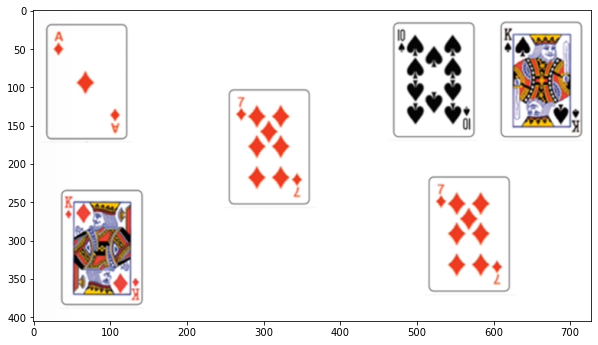

In [27]:
image_base = cv2.imread('baseCartas.png')
image_base = cv2.cvtColor(image_base, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image_base, cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (10,10))
plt.imshow(image_base); plt.show();

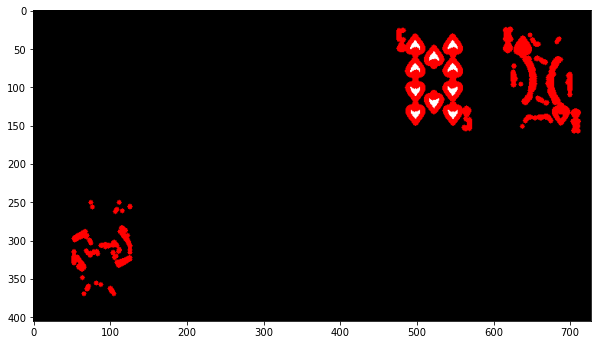

In [28]:
img_hsv = cv2.cvtColor(image_base, cv2.COLOR_BGR2HSV)

image_lower = np.array([0, 0, 0])  
image_upper = np.array([200, 100, 100])
mask_hsv = cv2.inRange(img_hsv, image_lower, image_upper)

contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"
cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);
plt.figure(figsize = (10,10))  
plt.imshow(contornos_img);

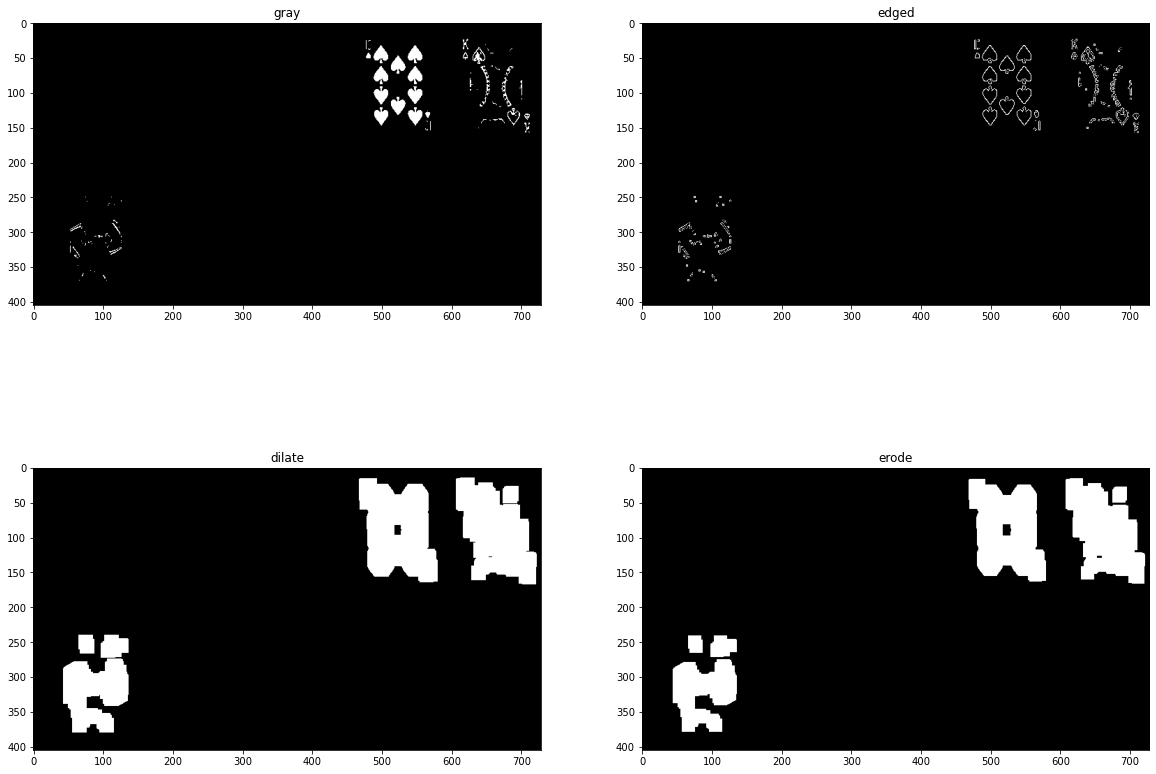

In [34]:
#uma solução possivel...
#carregamos a imagem, convertemos para níveis de cinza e a borramos levemente
quadradoSeparado = cv2.cvtColor(mask_hsv, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(quadradoSeparado, cv2.COLOR_BGR2GRAY)

#calculamos as arestas e realizamos uma dilatação + erosão para fechar
#eventuais gaps entre as arestas dos objetos
edged = cv2.Canny(gray, 50, 150)
dilate = cv2.dilate(edged, None, iterations=9)
erode = cv2.erode(dilate, None, iterations=1)

plt.figure(figsize = (20,15))
plt.subplot(2, 2, 1), plt.imshow(gray, 'gray'), plt.title('gray')
plt.subplot(2, 2, 2), plt.imshow(edged, 'gray'), plt.title('edged')
plt.subplot(2, 2, 3), plt.imshow(dilate, 'gray'), plt.title('dilate')
plt.subplot(2, 2, 4), plt.imshow(erode, 'gray'), plt.title('erode')
plt.show();


In [30]:
cnts, _ = cv2.findContours(erode.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

(cnts, boundingBoxes) = zip(*sorted(zip(cnts, [cv2.boundingRect(c) for c in cnts]), key=lambda b: b[1][0], reverse=False))

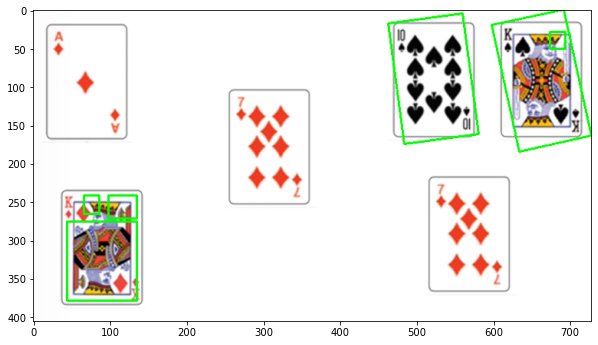

In [31]:

orig = image_base.copy()

#Percorre todos os contornos
for c in cnts:
    
    
    
  # se o contorno não é suficientemente grande, ignorá-lo
    if cv2.contourArea(c) > 1:
        box = cv2.minAreaRect(c)
        box = cv2.boxPoints(box) 
        box = np.array(box, dtype="int")

        cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)


  # calcula a bounding box rotacionada do contorno

plt.figure(figsize = (10,10))
plt.imshow(orig); plt.show();


In [1]:
import cv2
import numpy as np
cap = cv2.VideoCapture("q2.mp4")

w = 1000
h = 600

while True:
    ret, frame = cap.read()

    if not ret:
        break
    
    frame1 = cv2.resize(frame, (w, h))
    
    
    img_hsv = cv2.cvtColor(frame1, cv2.COLOR_BGR2HSV)

    image_lower_Preta = np.array([0, 0, 0])  
    image_upper_Preta = np.array([200, 100, 100])
    mask_hsvPreta = cv2.inRange(img_hsv, image_lower_Preta, image_upper_Preta)
    
    CartaSeparadoPreta = cv2.cvtColor(mask_hsvPreta, cv2.COLOR_BGR2RGB)
    grayPreta = cv2.cvtColor(CartaSeparadoPreta, cv2.COLOR_BGR2GRAY)
    edgedPreta = cv2.Canny(grayPreta, 50, 150)
    dilatePreta = cv2.dilate(edgedPreta, None, iterations=9)
    erodePreta = cv2.erode(dilatePreta, None, iterations=1)
   

    cntsPreta, _ = cv2.findContours(erodePreta.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

    
    orig = frame1.copy()
    
    numeroCartaPreta = 0
    
    if cntsPreta == ():
        continue
    else:
        (cntsPreta, boundingBoxes) = zip(*sorted(zip(cntsPreta, [cv2.boundingRect(c) for c in cntsPreta]), key=lambda b: b[1][0], reverse=False))
        for c in cntsPreta:
  # se o contorno não é suficientemente grande, ignorá-lo
            if cv2.contourArea(c) >= 17000:
                boxPreta = cv2.minAreaRect(c)
                boxPreta = cv2.boxPoints(boxPreta) 
                boxPreta = np.array(boxPreta, dtype="int")

                cv2.drawContours(orig, [boxPreta.astype("int")], -1, (217, 35, 217), 2)
                
                numeroCartaPreta = numeroCartaPreta + 1
                

    # Exibe resultado
    origem_areaPreta = (10,570)
    font_area = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(orig, str("Cartas Pretas: {}").format(numeroCartaPreta), origem_areaPreta, font_area,1,(20, 184, 184),2,cv2.LINE_AA)

    cv2.imshow("Feed", orig)

    # Wait for key 'ESC' to quit
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break

# That's how you exit
cap.release()
cv2.destroyAllWindows()